In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

os.chdir('C:/Users/Matthew/Documents/Python_Data')
titanic = pd.read_csv('titanic3.csv')

In [2]:
drop_cols = ['parch', 'sibsp']

titanic = titanic.drop(drop_cols, axis = 1)

In [3]:
titanic.head(5)
titanic.shape
titanic.describe()
titanic.info()

,pclass,survived,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


(1310, 12)

,pclass,survived,age,fare,body
count,1309.000000,1309.000000,1046.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,33.295479,160.809917
std,0.837836,0.486055,14.413500,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,1.000000
25%,2.000000,0.000000,21.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,512.329200,328.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   ticket     1309 non-null   object 
 6   fare       1308 non-null   float64
 7   cabin      295 non-null    object 
 8   embarked   1307 non-null   object 
 9   boat       486 non-null    object 
 10  body       121 non-null    float64
 11  home.dest  745 non-null    object 
dtypes: float64(5), object(7)
memory usage: 122.9+ KB


In [4]:
titanic_sorted = titanic.sort_values(by = 'age', ascending = False)
titanic_sorted.head()

,pclass,survived,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest
14,1.0,1.0,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1.0,1.0,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
1235,3.0,0.0,"Svensson, Mr. Johan",male,74.0,347060,7.7750,NaN,S,NaN,NaN,NaN
135,1.0,0.0,"Goldschmidt, Mr. George B",male,71.0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [5]:
def min_max_values(col):
    top = titanic[col].idxmax()
    top_obs = pd.DataFrame(titanic.loc[top])
    
    bottom = titanic[col].idxmin()
    bottom_obs = pd.DataFrame(titanic.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bottom_obs], axis = 1)
    
    return min_max_obs

In [6]:
min_max_values('age')

,14,763
pclass,1,3
survived,1,1
name,"Barkworth, Mr. Algernon Henry Wilson","Dean, Miss. Elizabeth Gladys ""Millvina"""
sex,male,female
age,80,0.1667
ticket,27042,C.A. 2315
fare,30,20.575
cabin,A23,NaN
embarked,S,S
boat,B,10


C:\Users\Matthew\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Matthew\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

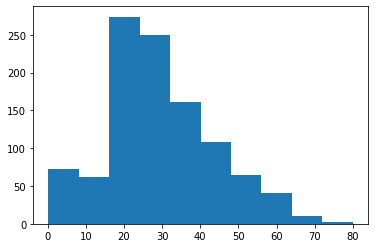

In [7]:
num_bins = 10
plt.hist(titanic['age'], num_bins)

In [8]:
#subetting the data
sex = titanic.groupby('sex').size()
sex

sex
female    466
male      843
dtype: int64